In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('censes.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

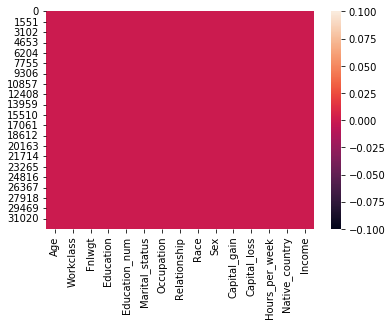

In [6]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

There is no null value or missing data in the dataset

In [8]:
#Statisticial Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


1. counts are same for all the columns
2. mean is greater than 50% in all the columns
3. there is a huge difference between the max and 75% in all the columns
4. std is more than 1

In [9]:
#Exploring target data variable
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

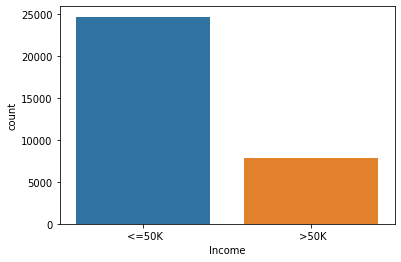

In [10]:
#checking income column value
sns.countplot(x='Income', data=df);

The income count of <=50K is much more than the count of >50K and therefore the data is imbalanced.

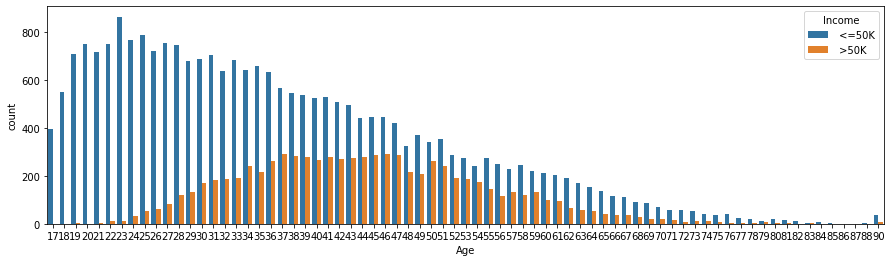

In [17]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Age',hue="Income", data=df)

1. maximum people from the age group of 20-30 have the income <=50k
2. 300 count of people from the age group of 35-45 has the income >50k


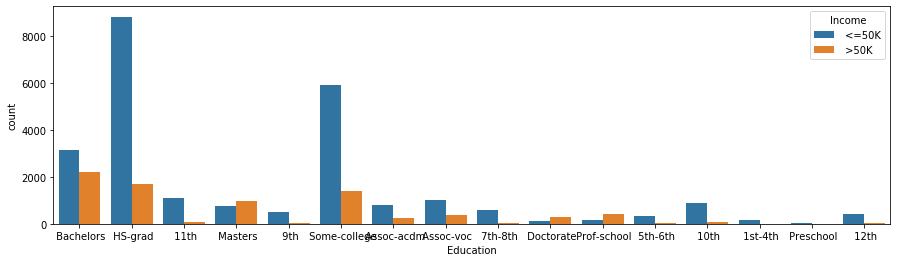

In [18]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Education',hue="Income", data=df)

1. maximum people with HS-grad has the income <=50k
2. very few people with >50k are doctorate,prof-school
3. almost 2000 people with bachelors degree has the income >50k

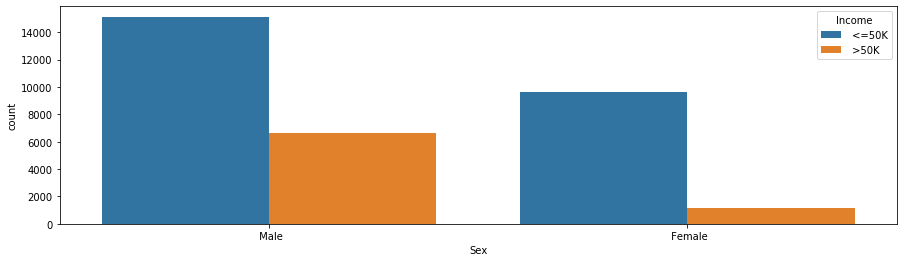

In [22]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Sex',hue="Income", data=df)

1. male count is more thean female
2. male count of income <=50k is almost more than 14000 whereas the female count is just 9000
3. male count of income >50k is 6000 whereas female count is less than 2000

In [27]:
#coverting string data into integer data using LabelEncoder
import sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list1=['Workclass','Occupation','Education','Sex','Race','Marital_status','Native_country','Income','Relationship']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [28]:
#checking correlation
dfcor=df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


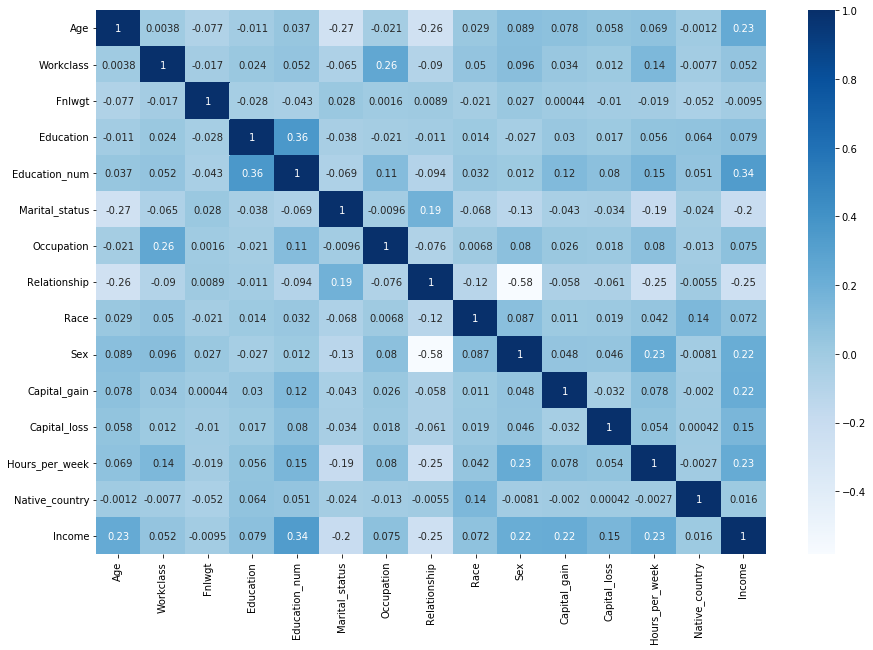

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap="Blues",annot=True)

1. income is positively correlated with hours per week, capital gain, sex, education num and age
2. income is negatively correlated with martial status, fnlwgt and relationship

Age                  AxesSubplot(0.125,0.772143;0.110714x0.107857)
Workclass         AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Fnlwgt            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Education         AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Education_num     AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Marital_status    AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Occupation           AxesSubplot(0.125,0.642714;0.110714x0.107857)
Relationship      AxesSubplot(0.257857,0.642714;0.110714x0.107857)
Race              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Sex               AxesSubplot(0.523571,0.642714;0.110714x0.107857)
Capital_gain      AxesSubplot(0.656429,0.642714;0.110714x0.107857)
Capital_loss      AxesSubplot(0.789286,0.642714;0.110714x0.107857)
Hours_per_week       AxesSubplot(0.125,0.513286;0.110714x0.107857)
Native_country    AxesSubplot(0.257857,0.513286;0.110714x0.107857)
Income            AxesSubplot(0.390714,0.513286;0.110714x0.107

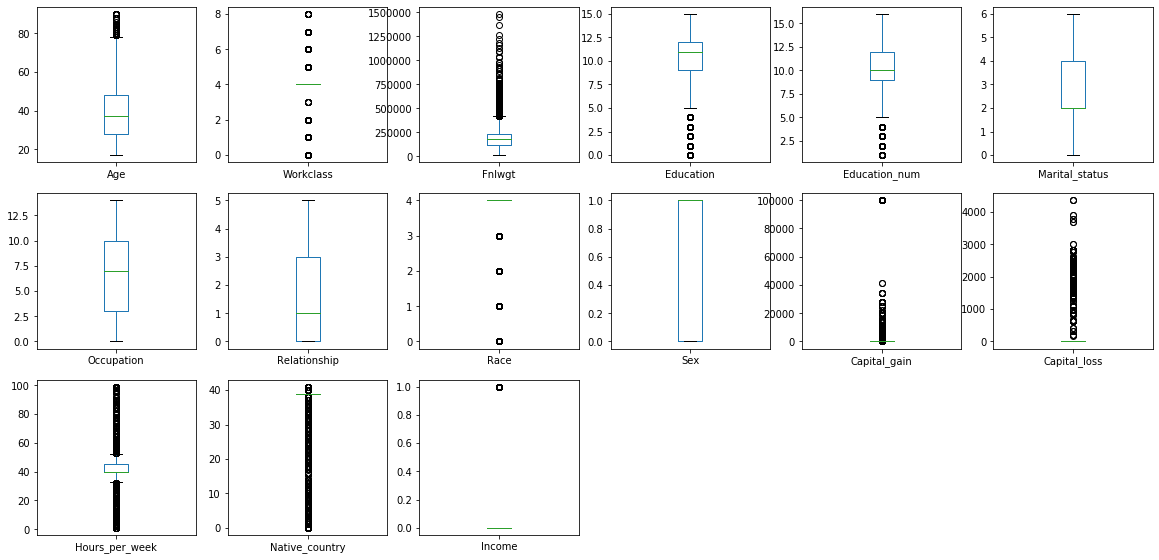

In [31]:
#finding outliers
df.plot(kind='box',subplots=True,figsize=(20,20),layout=(6,6))

outliers are present in the income, nativecountry,hoursperweek, race, capital gain,capital loss,age, workclass, fnlwgt,education and education-num columns

In [32]:
#checking skewness
df.skew().sort_values()

Native_country    -3.658235
Race              -2.435332
Education         -0.934063
Workclass         -0.752280
Sex               -0.719244
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Hours_per_week     0.227636
Age                0.558738
Relationship       0.786784
Income             1.212383
Fnlwgt             1.446972
Capital_loss       4.594549
Capital_gain      11.953690
dtype: float64

skewness is present in dataset

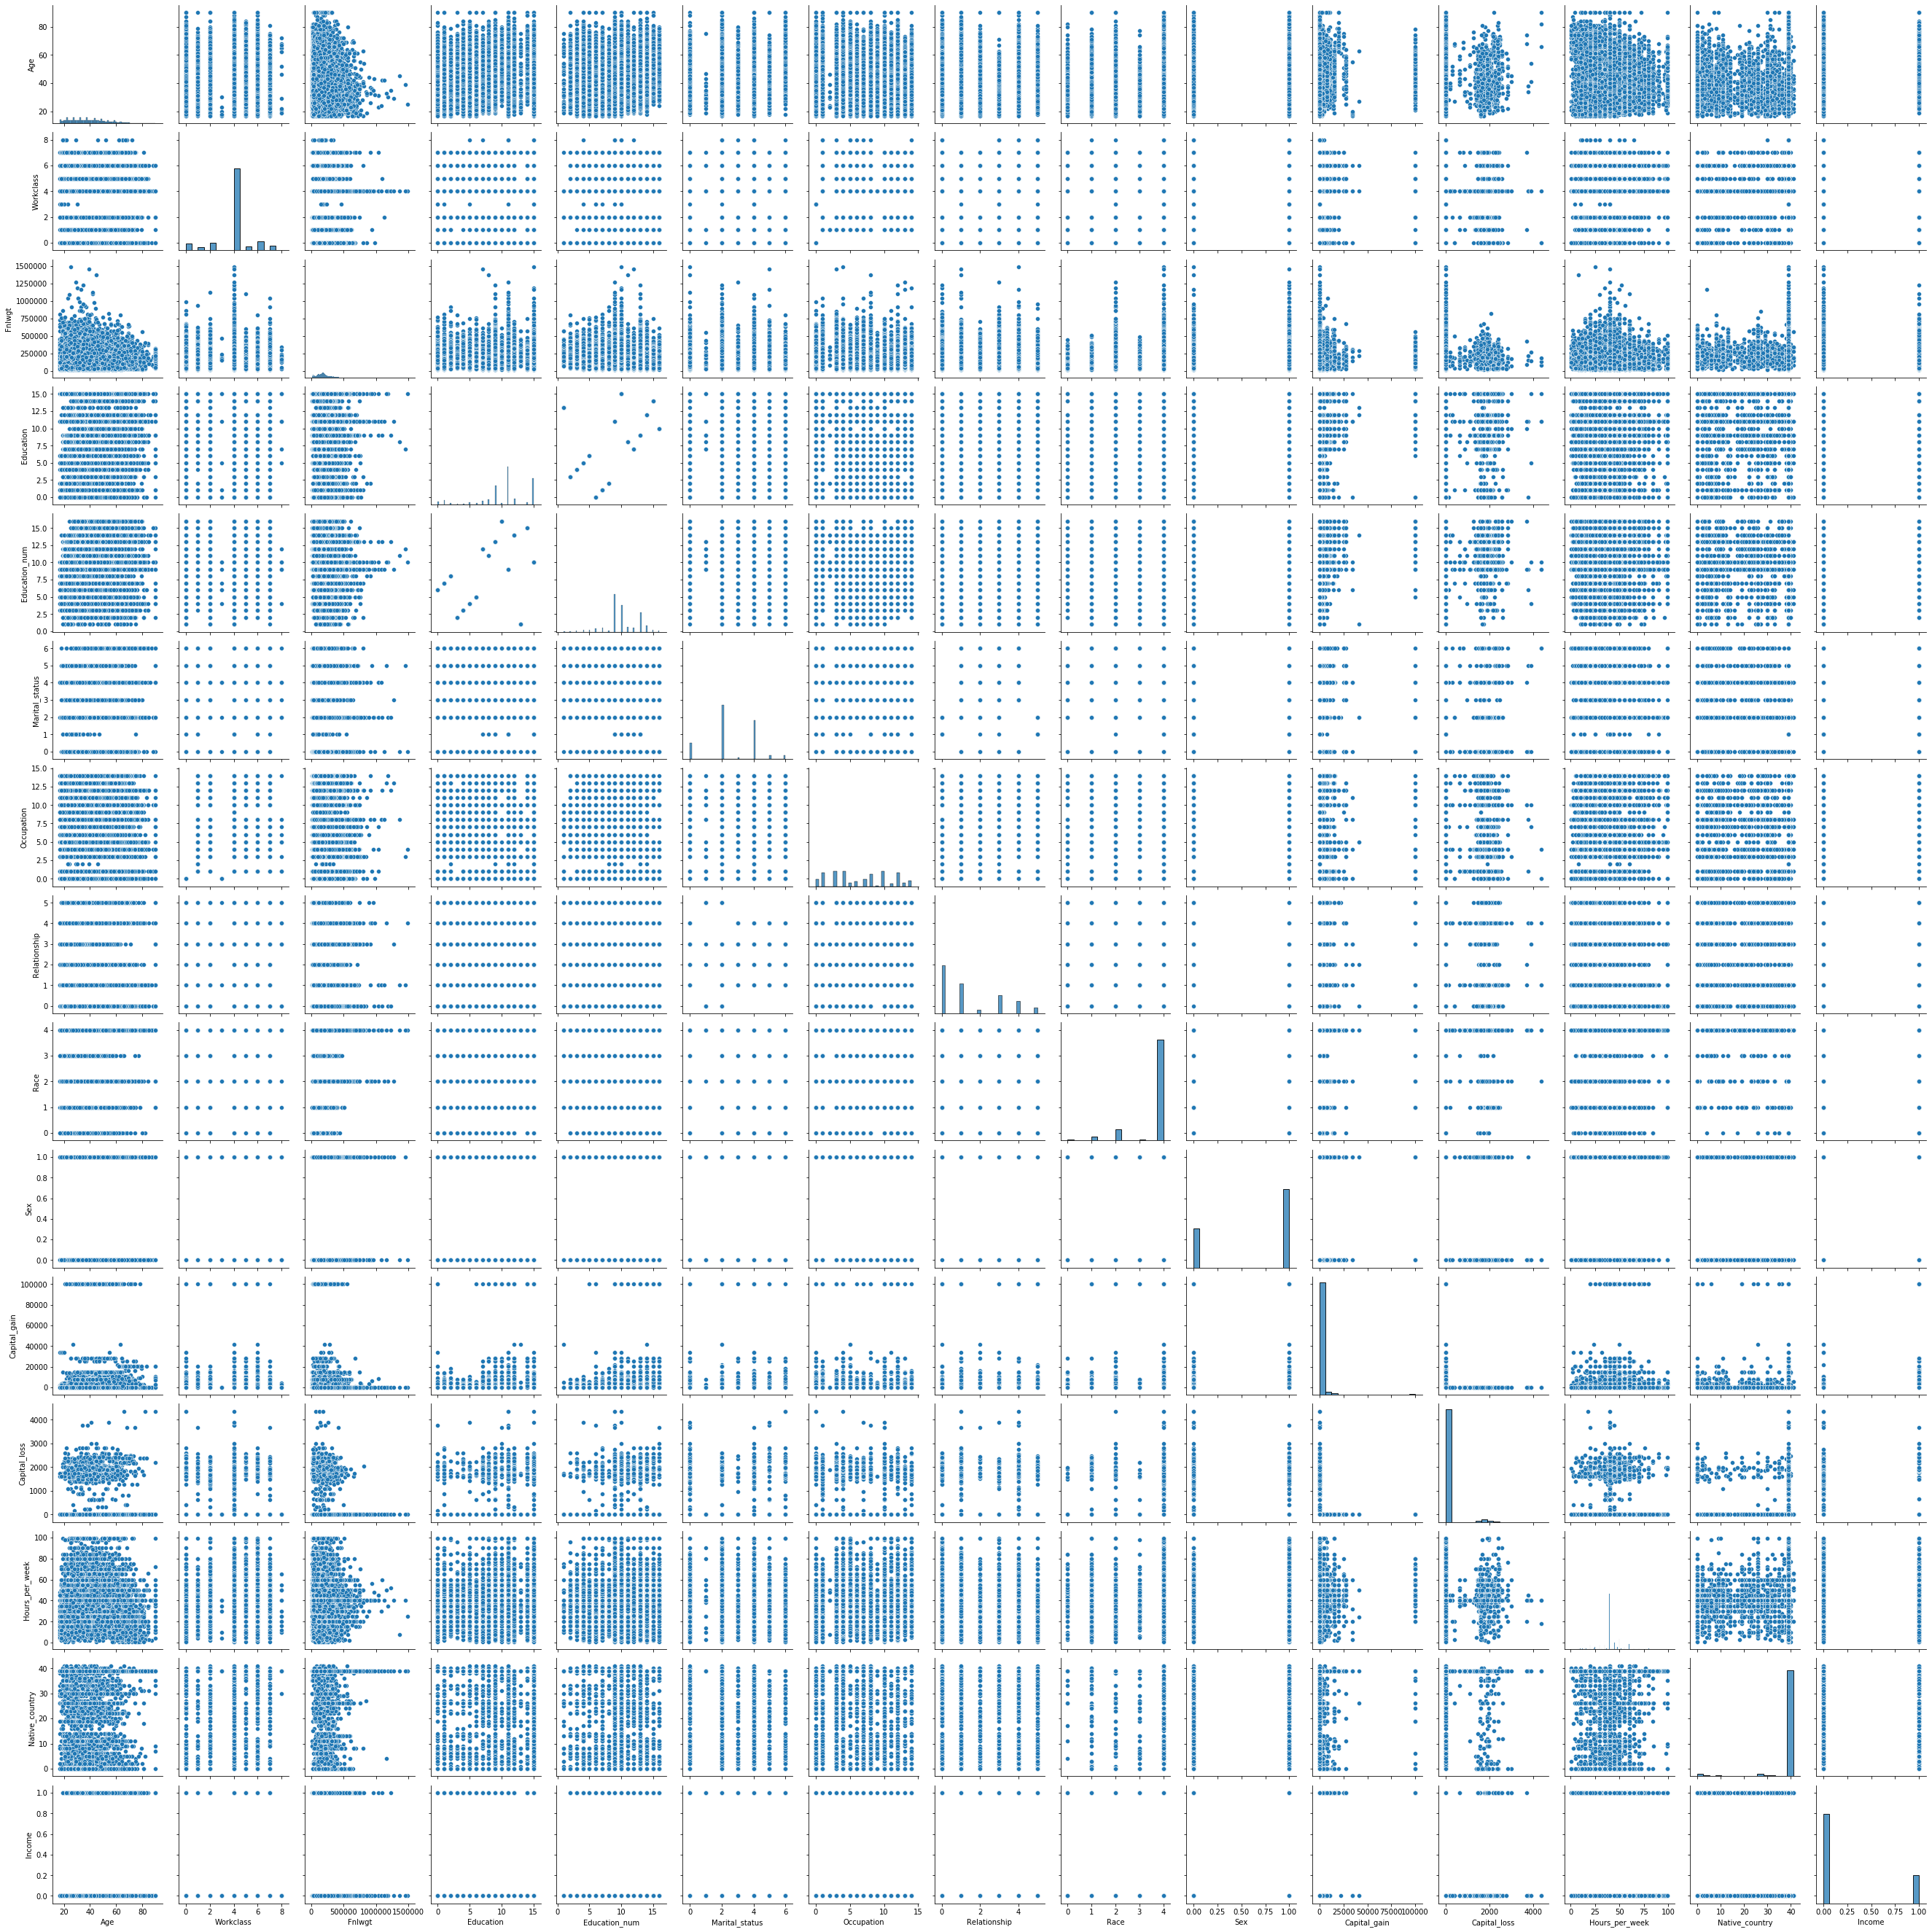

In [33]:
sns.pairplot(df)
plt.show()

In [34]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,1:]))
z

array([[1.46388339, 1.0087417 , 0.33544266, ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.09012148, 0.24504633, 0.18131885, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [0.09012148, 0.42576955, 2.40248871, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [0.09012148, 0.3588108 , 0.18131885, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [0.09012148, 0.11092744, 0.18131885, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.77700244, 0.92986178, 0.18131885, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [35]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [36]:
dfnew=df[(z<3).all(axis=1)]
dfnew

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


almost 5053 rows are dropped

In [44]:
#separating data
x=dfnew.iloc[:,0:-1]
y=dfnew.iloc[:,-1]

In [45]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [46]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27507, dtype: int32

In [47]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [48]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [49]:
x_train=st.fit_transform(x_train)
x_train

array([[ 0.27867779,  0.08373047, -0.71115338, ..., -0.0371148 ,
         0.00979804,  0.19323757],
       [ 0.42610863, -2.69532177, -0.80700653, ..., -0.0371148 ,
        -2.12815653,  0.19323757],
       [-0.53219178,  0.08373047,  3.20142662, ..., -0.0371148 ,
         0.00979804,  0.19323757],
       ...,
       [ 0.94211654,  0.08373047,  0.36662425, ..., -0.0371148 ,
         0.00979804,  0.19323757],
       [ 1.90041695, -1.30579565,  0.04965642, ..., -0.0371148 ,
         0.00979804,  0.19323757],
       [-1.12191511,  2.16801964, -1.37469903, ..., -0.0371148 ,
        -0.88101636,  0.19323757]])

In [50]:
x_test=st.transform(x_test)
x_test

array([[-0.67962262,  0.08373047, -0.58480971, ..., -0.0371148 ,
         1.79142685,  0.19323757],
       [-1.19563053,  0.08373047, -0.41085243, ..., -0.0371148 ,
        -2.21723797,  0.19323757],
       [-1.12191511,  0.08373047,  0.32709477, ..., -0.0371148 ,
        -2.12815653,  0.19323757],
       ...,
       [ 0.05753154,  0.08373047, -0.21409622, ..., -0.0371148 ,
         0.00979804,  0.19323757],
       [-1.34306136, -2.69532177, -0.17818444, ..., -0.0371148 ,
         0.00979804,  0.19323757],
       [ 0.64725487,  0.08373047,  2.66065999, ..., -0.0371148 ,
         0.00979804,  0.19323757]])

In [51]:
x_train.mean()

-3.4094242260684016e-17

In [52]:
x_train.std()

1.0

In [53]:
# Regularization:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.27897316178212905


array([ 0.05771814, -0.00534955,  0.00103592, -0.01265354,  0.10508141,
       -0.03314698,  0.00826754, -0.02086118,  0.01415651,  0.04453604,
        0.10653706, -0.00753634,  0.04352559,  0.00113883])

In [54]:
#using randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
f=RandomForestClassifier()
f.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
f.score(x_train,y_train)

0.9999457376960226

In [61]:
p=confusion_matrix(y_test,f.predict(x_test))
p

array([[2573, 1687],
       [ 834,  408]], dtype=int64)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lg=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i, "the model performs very well")
        print("at random state",i)
        print("training accuracy score is", round(accuracy_score(y_train,pred_train)*100,1))
        print("testing accuracy score is",round(accuracy_score(y_test,pred_test)*100,1),'\n\n' )

At random state 5 the model performs very well
at random state 5
training accuracy score is 80.2
testing accuracy score is 80.2 


At random state 49 the model performs very well
at random state 49
training accuracy score is 80.9
testing accuracy score is 80.9 


At random state 52 the model performs very well
at random state 52
training accuracy score is 80.1
testing accuracy score is 80.1 


At random state 98 the model performs very well
at random state 98
training accuracy score is 81.0
testing accuracy score is 81.0 


At random state 111 the model performs very well
at random state 111
training accuracy score is 80.1
testing accuracy score is 80.1 


At random state 130 the model performs very well
at random state 130
training accuracy score is 81.0
testing accuracy score is 81.0 


At random state 145 the model performs very well
at random state 145
training accuracy score is 80.2
testing accuracy score is 80.2 


At random state 164 the model performs very well
at random state 

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=98)

In [63]:
lg.fit(x_train,y_train)

LogisticRegression()

In [64]:
pred_train=lg.predict(x_train)

In [65]:
pred_test=lg.predict(x_test)

In [66]:
accuracy_score(y_train,pred_train)

0.8101795046580322

In [67]:
accuracy_score(y_test,pred_test)

0.8097055616139586

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4237
           1       0.86      0.21      0.33      1265

    accuracy                           0.81      5502
   macro avg       0.83      0.60      0.61      5502
weighted avg       0.82      0.81      0.76      5502



In [69]:
#cross validation
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lg)

In [70]:
for j in range(4,10):
    lsscore= cross_val_score(lg,x,y,cv=j)
    print(lsscore)
    lsc=lsscore.mean()
    print('at cv:-',j)
    print("cross validation score is:", lss*100)
    print("accuracy score is",lss*100)
    print("\n")

[0.79831322 0.7993311  0.80805584 0.80584642]
at cv:- 4
cross validation score is: 80.97055616139586
accuracy score is 80.97055616139586


[0.80388949 0.80370774 0.81276132 0.79767315 0.80258135]
at cv:- 5
cross validation score is: 80.97055616139586
accuracy score is 80.97055616139586


[0.80087241 0.79476554 0.80043621 0.80977312 0.79952007 0.80693717]
at cv:- 6
cross validation score is: 80.97055616139586
accuracy score is 80.97055616139586


[0.80203562 0.79898219 0.79643766 0.80585242 0.79791295 0.80122168
 0.80529397]
at cv:- 7
cross validation score is: 80.97055616139586
accuracy score is 80.97055616139586


[0.80023263 0.80168654 0.79587089 0.80308319 0.80715532 0.78970332
 0.80250145 0.80075625]
at cv:- 8
cross validation score is: 80.97055616139586
accuracy score is 80.97055616139586


[0.80274779 0.79980373 0.79882237 0.80104712 0.80137435 0.80104712
 0.80399215 0.80170157 0.8085733 ]
at cv:- 9
cross validation score is: 80.97055616139586
accuracy score is 80.97055616139586


selecting cv=9 as cross validation score is same for all the cv

In [71]:
lsscore_selected= cross_val_score(lg,x,y,cv=9).mean()
print("The cv score is", lsscore_selected,'\n the accuracy score is',lss)

The cv score is 0.80212327756341 
 the accuracy score is 0.8097055616139586


In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
lg

LogisticRegression()

In [74]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train= algorithm_instance.predict(x_train)
    model_1_pred_test= algorithm_instance.predict(x_test)
    print("accuracy of training model:",accuracy_score(y_train,model_1_pred_train))
    print("accuracy of testing model:",accuracy_score(y_test,model_1_pred_test))
    print("classification report for test data \n",classification_report(y_test,model_1_pred_test))
    print("classification report for train data \n",classification_report(y_train,model_1_pred_train))
    print("confusion matrix: \n", confusion_matrix(y_test,model_1_pred_test))

In [75]:
model_selection(lg,x_train,y_train, x_test,y_test)

accuracy of training model: 0.8101795046580322
accuracy of testing model: 0.8097055616139586
classification report for test data 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      4237
           1       0.86      0.21      0.33      1265

    accuracy                           0.81      5502
   macro avg       0.83      0.60      0.61      5502
weighted avg       0.82      0.81      0.76      5502

classification report for train data 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     17120
           1       0.79      0.20      0.31      4885

    accuracy                           0.81     22005
   macro avg       0.80      0.59      0.60     22005
weighted avg       0.81      0.81      0.76     22005

confusion matrix: 
 [[4195   42]
 [1005  260]]


In [76]:
#saving the best model
import pickle
filename='Censes.pkl'
pickle.dump(lg, open(filename, 'wb'))
#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
#conclusion
result=loaded_model.score(x_test,y_test)
print(result*100)

80.97055616139586


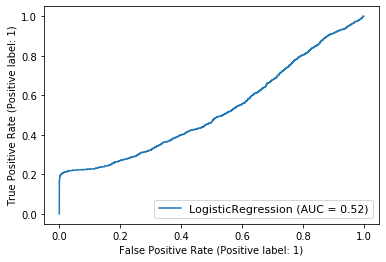

<Figure size 720x720 with 0 Axes>

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(loaded_model,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()